In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/fulldata.csv")
df.head()

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09


In [3]:
df_other_var = df[['Title','Score','Num of Comments']]
df_other_var = df_other_var.rename({'Score':'Upvotes','Num of Comments':'Comments'},axis=1)

In [5]:
df_other_var['length'] = df_other_var['Title'].apply(lambda x: len(x))

In [7]:
import re

def count_capitalized_words(text):
    capitalized_words = re.findall(r'\b[A-Z][a-zA-Z]+\b', text)
    return len(capitalized_words)

In [8]:
df_other_var['Capitals'] = df_other_var['Title'].apply(count_capitalized_words)

In [9]:
df_other_var.head()

,Title,Upvotes,Comments,length,Capitals
0,"No matter who someone is, how they look like, ...",1,0,203,2
1,Biden speech draws 38.2 million U.S. TV viewers,6,1,47,2
2,State of the union,1,1,18,1
3,We Should Just Give Poor People Money,7,3,37,7
4,Do it for the Dew,6,1,17,2


In [12]:
from sklearn.linear_model import LogisticRegression

In [19]:
y = df['Political Lean']
X = df_other_var[['Upvotes','Comments','length','Capitals']]

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state=13)
X, y = oversample.fit_resample(X, y)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15)

In [20]:
l_reg = LogisticRegression()
l_reg.fit(X_train,y_train)

LogisticRegression()

<Axes: >

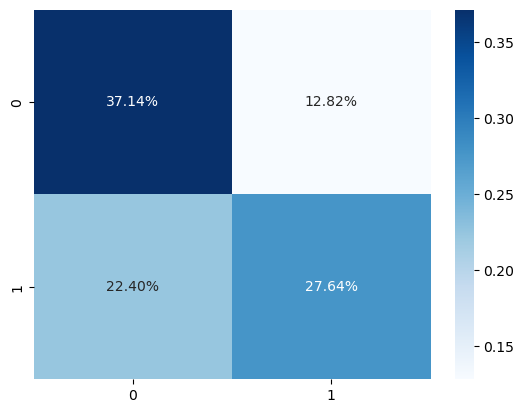

In [21]:
y_pred = l_reg.predict(X_test)

from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')